<a href="https://colab.research.google.com/github/MatheusOrange211/Bootcamp-Alura/blob/main/projeto_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bar_chart_race

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import seaborn as sns
import bar_chart_race as bcr

In [3]:
dados = pd.read_csv('/content/caso.csv',encoding='utf-8',sep=',',engine='python')
dados['city_ibge_code'] = dados['city_ibge_code'].astype("string")
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


In [4]:
pd.options.display.float_format = "{:.2f}".format

#Número de Casos Confirmados nas Unidades Federativas

In [5]:
organizado_por_estados_dados_incompletos = dados
organizado_por_estados_dados_incompletos = organizado_por_estados_dados_incompletos.drop(['order_for_place','is_last','estimated_population_2019',
                                                                                          'estimated_population','city_ibge_code',
                                                                                          'confirmed_per_100k_inhabitants','death_rate','place_type',
                                                                                          'city'],axis=1)

In [6]:
organizado_por_estados_dados_incompletos = organizado_por_estados_dados_incompletos.fillna(0)
organizado_por_estados_dados_incompletos = organizado_por_estados_dados_incompletos.drop_duplicates(['state'])

Text(0.5, 1.0, 'Total de casos confirmados nas Unidades Federativas')

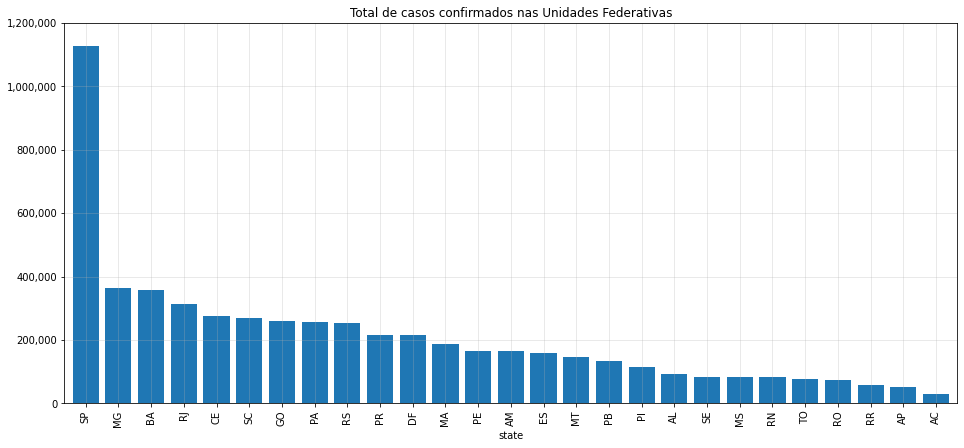

In [7]:
estados_confirmados = organizado_por_estados_dados_incompletos.groupby(['state']).sum()
estados_confirmados = estados_confirmados.sort_values(by='confirmed',ascending=False)
grafico_estados_confirmados = estados_confirmados['confirmed'].plot(kind='bar',figsize=(16,7),width=0.8)
grafico_estados_confirmados.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.grid('gray',alpha=0.35)
plt.ylim(0,1200000)
plt.title("Total de casos confirmados nas Unidades Federativas")

#Número de mortes por Unidade Federativa

Text(0.5, 1.0, 'Total de Mortes nas Unidades Federativas')

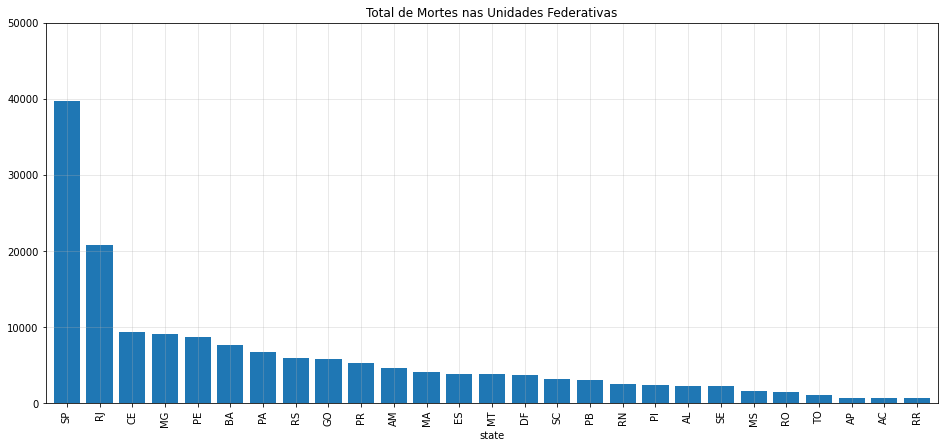

In [8]:
estados_mortes = estados_confirmados.sort_values(by='deaths',ascending=False)
estados_mortes['deaths'].plot(kind='bar',figsize=(16,7),width=0.8)
plt.grid('gray',alpha=0.35)
plt.ylim(0,50000)
plt.title("Total de Mortes nas Unidades Federativas")

#Percentual de mortes por casos confirmados em cada Unidade Federativa

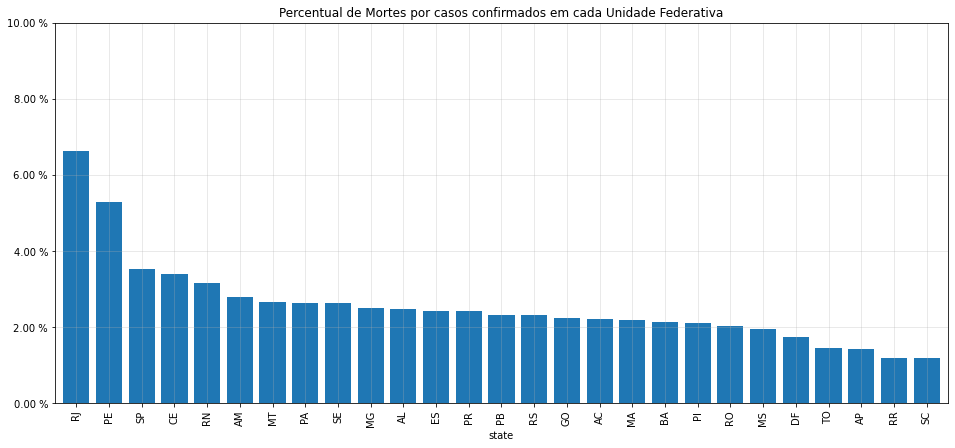

In [9]:
morte_por_confirmados = (estados_mortes['deaths'] / estados_mortes['confirmed'])*100
morte_por_confirmados = morte_por_confirmados.sort_values(ascending=False)
grafico_morte_por_confirmados = morte_por_confirmados.plot(kind='bar',figsize=(16,7),width=0.8)
grafico_morte_por_confirmados.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f} %'))
plt.grid('gray',alpha=0.35)
plt.ylim(0,10)
plt.title("Percentual de Mortes por casos confirmados em cada Unidade Federativa")
plt.show()

#Número de casos por Regiões

In [10]:
dados_por_regiao = dados
dados_por_regiao = dados_por_regiao.drop(['order_for_place','estimated_population_2019','estimated_population','confirmed_per_100k_inhabitants',
                       'death_rate','is_last','city'],axis=1)

In [11]:
apenas_estados = dados_por_regiao['place_type'] == 'state'
apenas_estados = dados_por_regiao[apenas_estados]

In [12]:
apenas_estados = apenas_estados.set_index("date")

In [13]:
ibge_code = apenas_estados.groupby(['state','city_ibge_code'])['confirmed','deaths'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [14]:
estados_com_cod = pd.merge(estados_confirmados,ibge_code,left_index=True,right_index=True)
estados_com_cod = estados_com_cod.drop(['confirmed_y','deaths_y'],axis=1)
estados_com_cod = estados_com_cod.rename(columns={'confirmed_x':'confirmed','deaths_x':'deaths'})
estados_com_cod= estados_com_cod.reset_index('state')

In [15]:
estados_com_cod

,state,confirmed,deaths
city_ibge_code,,,
12.0,AC,31248,697
27.0,AL,91270,2258
13.0,AM,164070,4607
16.0,AP,52832,751
29.0,BA,359130,7731
23.0,CE,277072,9392
53.0,DF,214955,3728
32.0,ES,159813,3896
52.0,GO,260133,5869


In [16]:
estados_com_cod['region'] = estados_com_cod.index.str[0]
regioes_map = {1:"Norte",2:"Nordeste",3:"Sudeste",4:"Sul",5:"Centro-Oeste"}
estados_com_cod['region'] = estados_com_cod['region'].map(lambda x: regioes_map[int(x)])


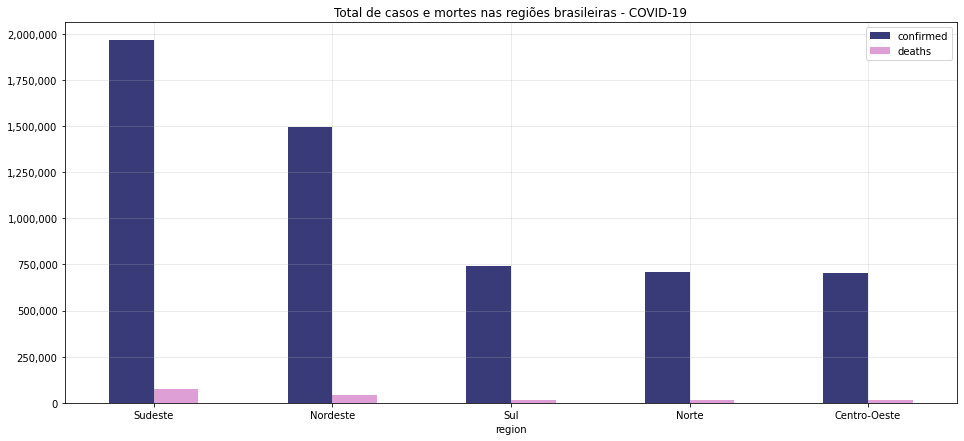

In [17]:
total_regioes_brasil = estados_com_cod.groupby('region').sum()
total_regioes_brasil = total_regioes_brasil.sort_values(by='confirmed',ascending=False)

grafico_total_regioes_brasil = total_regioes_brasil.plot(kind='bar',figsize=(16,7),colormap='tab20b')
grafico_total_regioes_brasil.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=0)
plt.title("Total de casos e mortes nas regiões brasileiras - COVID-19")
plt.grid(alpha=0.3)

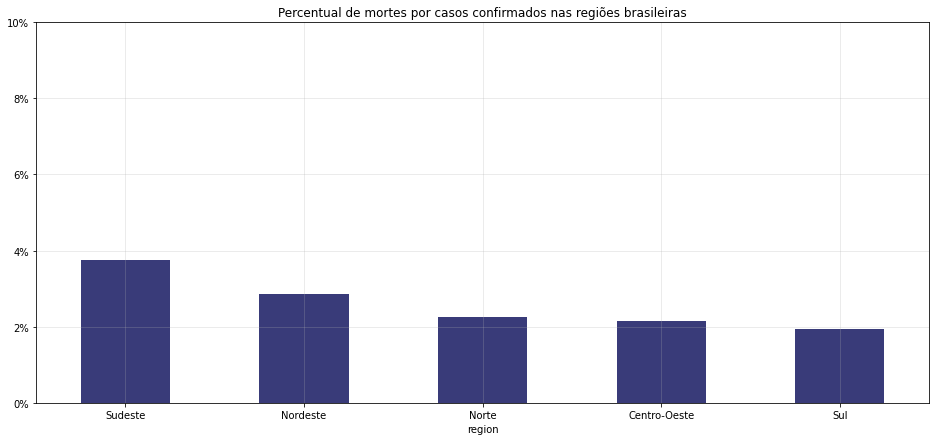

In [18]:
percentual_regioes = (total_regioes_brasil['deaths']/total_regioes_brasil['confirmed'])*100
percentual_regioes = percentual_regioes.sort_values(ascending=False)
grafico_percentual_regioes = percentual_regioes.plot(kind='bar',figsize=(16,7),colormap='tab20b')
grafico_percentual_regioes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}%"))
plt.grid(alpha=0.3)
plt.xticks(rotation=0)
plt.ylim(0,10)
plt.title("Percentual de mortes por casos confirmados nas regiões brasileiras")
plt.show()

#Bar_chart_race

In [19]:
dados_por_tempo = dados
dados_por_tempo =dados_por_tempo.drop(['order_for_place','estimated_population_2019','estimated_population','confirmed_per_100k_inhabitants',
                       'death_rate','is_last','city','city_ibge_code'],axis=1)
dados_estados = dados_por_tempo['place_type']=='state'
dados_por_tempo = dados_por_tempo[dados_estados]

In [20]:
dados_por_tempo = dados_por_tempo.fillna(0)
dados_por_tempo_confirmado = dados_por_tempo.pivot(index='state',columns='date',values='confirmed')
dados_por_tempo_confirmado = dados_por_tempo_confirmado.fillna(0)
dados_por_tempo_confirmado = dados_por_tempo_confirmado.drop(['2020-11-04','2020-11-05'],axis=1)
dados_por_tempo_confirmado

date,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00,4.00,7.00,11.00,11.00,17.00,21.00,23.00,23.00,25.00,25.00,34.00,41.00,42.00,43.00,45.00,46.00,46.00,...,27710.00,27859.00,27874.00,27885.00,28030.00,28222.00,28409.00,28555.00,28662.00,28672.00,28687.00,28805.00,28818.00,28834.00,29017.00,29031.00,29050.00,29063.00,29272.00,29301.00,29406.00,29598.00,29693.00,29718.00,29765.00,29865.00,29925.00,30028.00,30121.00,30217.00,30304.00,30317.00,30380.00,30545.00,30638.00,30758.00,30796.00,30951.00,30954.00,30962.00
AL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,4.00,6.00,7.00,7.00,8.00,10.00,11.00,11.00,12.00,14.00,17.00,17.00,18.00,18.00,18.00,23.00,23.00,...,85937.00,86124.00,86294.00,86393.00,86549.00,86879.00,87504.00,87750.00,87928.00,88098.00,88135.00,88283.00,88426.00,88538.00,88653.00,88790.00,88826.00,88880.00,88954.00,89082.00,89192.00,89278.00,89365.00,89493.00,89528.00,89644.00,89746.00,89847.00,89994.00,90124.00,90177.00,90254.00,90384.00,90497.00,90564.00,90671.00,90789.00,90820.00,90918.00,91016.00
AM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,2.00,3.00,7.00,11.00,26.00,32.00,47.00,54.00,67.00,81.00,111.00,140.00,151.00,175.00,200.00,229.00,260.00,311.00,...,135205.00,136169.00,136416.00,136708.00,137964.00,139326.00,140240.00,141199.00,142137.00,142382.00,142573.00,143571.00,144492.00,145367.00,146233.00,147038.00,147457.00,147465.00,147864.00,148518.00,149366.00,149784.00,151186.00,151597.00,151858.00,152796.00,154465.00,155230.00,156196.00,156975.00,157324.00,157668.00,158718.00,159583.00,160596.00,161434.00,161683.00,161974.00,162139.00,162560.00
AP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,3.00,4.00,8.00,8.00,10.00,11.00,12.00,19.00,29.00,...,47657.00,47745.00,47795.00,47935.00,48054.00,48254.00,48385.00,48529.00,48602.00,48628.00,48701.00,48814.00,48963.00,49085.00,49215.00,49303.00,49386.00,49424.00,49593.00,49745.00,49890.00,50072.00,50150.00,50191.00,50263.00,50382.00,50594.00,50822.00,50968.00,51074.00,51127.00,51192.00,51427.00,51523.00,51875.00,52030.00,52175.00,52500.00,52653.00,52832.00
BA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,0.00,2.00,2.00,3.00,3.00,7.00,0.00,9.00,10.00,14.00,27.00,31.00,34.00,41.00,55.00,63.00,79.00,91.00,108.00,123.00,127.00,156.00,176.00,217.00,246.00,267.00,290.00,336.00,...,303058.00,305186.00,306036.00,306629.00,308252.00,310526.00,312050.00,313404.00,314711.00,315440.00,316005.00,318147.00,319981.00,321798.00,323210.00,324964.00,325957.00,326634.00,327327.00,329787.00,331362.00,332898.00,334697.00,335351.00,336232.00,337994.00,339215.00,340665.00,342526.00,344014.00,344705.00,345949.00,347721.00,349711.00,351277.00,352700.00,353157.00,354043.00,354576.00,354983.00
CE,0.00,0.00,0.00,0.00,0

#Timeline gráfico Mortes Confirmadas de Covid-19 (bar_chart_race)
>Para evitar a demora para processamento do vídeo, você pode ver ele [aqui](https://drive.google.com/file/d/1svIEs_APunNXj0SivgGBNVt9VOCpmI5y/view?usp=sharing).

In [21]:
# bcr.bar_chart_race(df=dados_por_tempo_confirmado.T,sort='desc',steps_per_period=5,figsize=(7,3),
#                    cmap='dark24',
#                    title='Timeline de casos confirmados da covid-19 nas Unidades Federativas',
#                    period_summary_func=lambda v, r: {'x': .98, 'y': .2,'s': f'Casos Confirmados: {v.sum():,.0f}', 
#                                           'ha': 'right', 'size': 8})

In [24]:
dados_por_tempo_mortes = dados_por_tempo.pivot(index='state',columns='date',values='deaths')
dados_por_tempo_mortes=dados_por_tempo_mortes.fillna(0)
dados_por_tempo_mortes = dados_por_tempo_mortes.drop(['2020-11-04','2020-11-05'],axis=1)
dados_por_tempo_mortes


date,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,654.00,656.00,657.00,657.00,657.00,659.00,661.00,664.00,667.00,667.00,667.00,668.00,668.00,669.00,674.00,674.00,674.00,675.00,675.00,676.00,677.00,679.00,679.00,679.00,679.00,682.00,682.00,685.00,686.00,686.00,687.00,689.00,690.00,691.00,692.00,693.00,693.00,693.00,693.00,695.00
AL,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,2.00,2.00,...,2046.00,2052.00,2055.00,2062.00,2067.00,2072.00,2078.00,2085.00,2091.00,2097.00,2103.00,2109.00,2115.00,2121.00,2126.00,2132.00,2138.00,2144.00,2151.00,2157.00,2162.00,2167.00,2172.00,2177.00,2182.00,2187.00,2192.00,2196.00,2201.00,2206.00,2211.00,2216.00,2221.00,2226.00,2230.00,2234.00,2238.00,2242.00,2246.00,2250.00
AM,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,3.00,3.00,3.00,7.00,12.00,...,4000.00,4022.00,4027.00,4031.00,4035.00,4042.00,4159.00,4162.00,4169.00,4176.00,4185.00,4193.00,4202.00,4215.00,4223.00,4235.00,4239.00,4247.00,4254.00,4268.00,4289.00,4305.00,4325.00,4332.00,4350.00,4363.00,4371.00,4396.00,4426.00,4433.00,4446.00,4460.00,4478.00,4491.00,4516.00,4528.00,4543.00,4555.00,4565.00,4573.00
AP,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,699.00,702.00,702.00,704.00,705.00,709.00,712.00,713.00,715.00,716.00,718.00,721.00,722.00,724.00,725.00,725.00,725.00,726.00,727.00,728.00,729.00,730.00,731.00,731.00,734.00,734.00,736.00,738.00,740.00,741.00,741.00,741.00,743.00,744.00,746.00,747.00,748.00,748.00,749.00,751.00
BA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,2.00,2.00,3.00,6.00,7.00,...,6503.00,6552.00,6599.00,6648.00,6697.00,6744.00,6795.00,6844.00,6890.00,6925.00,6953.00,6985.00,7021.00,7049.00,7075.00,7099.00,7128.00,7159.00,7188.00,7214.00,7243.00,7267.00,7288.00,7316.00,7342.00,7363.00,7384.00,7407.00,7432.00,7453.00,7475.00,7497.00,7519.00,7546.00,7571.00,7600.00,7622.00,7645.00,7667.00,7690.00
CE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,3.00,4.00,5.00,5.00,7.00,9.00,21.00,22.00,23.00,...,8905.00,8918.00,8921.00,8948.00,8957.00,8994.00,9047.00,9047.00,9051.00,9054.00,9067.00,9090.00,9104.00,9124.00,9129.00,9133.00,9134.00,9135.00,9140.00,9184.00,9199.00,9202.00,9207.00,9210.00,9217.00,9227.00,9243.00,9243.00,9245.00,9248.00,9259.00,9293.00,93

#Timeline gráfico Mortes Confirmadas de Covid-19 (bar_chart_race)
>Para evitar a demora para processamento do vídeo, você pode ver ele [aqui](https://drive.google.com/file/d/165hedaU4KOU35rBs-htpM60INU03YNSf/view?usp=sharing).

In [ ]:
# bcr.bar_chart_race(df=dados_por_tempo_mortes.T,sort='desc',steps_per_period=5,figsize=(7,3),
#                    cmap='dark24',
#                    title='Timeline de Mortes Confirmadas de covid-19 nas Unidades Federativas',
#                    period_summary_func=lambda v, r: {'x': .98, 'y': .2,'s': f'Mortes Confirmadas: {v.sum():,.0f}', 
#                                           'ha': 'right', 'size': 8})